In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
nadia = cv2.imread('C:/users/markp/Documents/computer vision/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/Nadia_murad.jpg',0)
denis = cv2.imread('C:/users/markp/Documents/computer vision/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg',0)
group = cv2.imread('C:/users/markp/Documents/computer vision/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/solvay_conference.jpg',0)


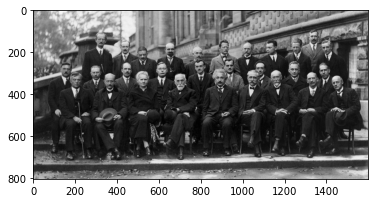

In [9]:
plt.imshow(group ,cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('C:/users/markp/Documents/computer vision/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [11]:
def face_detect(img):
    
    face_img = img.copy()
    
    faces = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),255,6)
        
        
    return face_img    

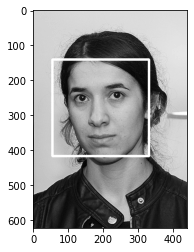

In [14]:
result = face_detect(nadia)
plt.imshow(result,cmap = 'gray')

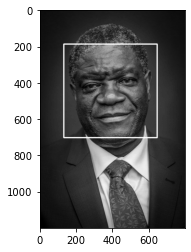

In [15]:
result = face_detect(denis)
plt.imshow(result,cmap = 'gray')

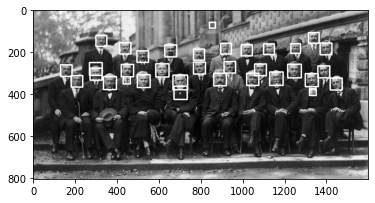

In [16]:
result = face_detect(group)
plt.imshow(result,cmap = 'gray')

#### In above photo our algorithm misclassify one image at back and it is also drawing double rectangle on some faces.
#### We can improve by changing parameters in --> detectMultiScale()

In [60]:
def updated_face_detect(img):
    
    face_img = img.copy()
    
    faces = face_cascade.detectMultiScale(face_img,scaleFactor =1.2,minNeighbors=8)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),255,6)
        
        
    return face_img    

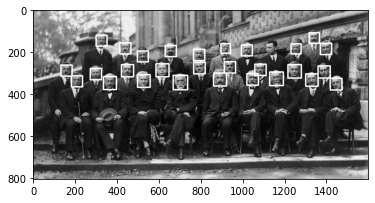

In [61]:
result = updated_face_detect(group)
plt.imshow(result,cmap = 'gray')

## eyes detection

In [62]:
eyes_cascade = cv2.CascadeClassifier('C:/users/markp/Documents/computer vision/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')

In [67]:
def eyes_detect(img):
    
    face_img = img.copy()
    
    eyes = eyes_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in eyes:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),255,6)
        
        
    return face_img    

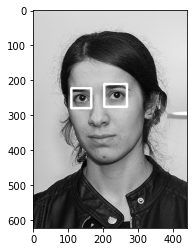

In [68]:
result = eyes_detect(nadia)
plt.imshow(result,cmap = 'gray')

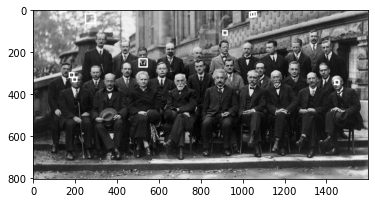

In [70]:
result = eyes_detect(group)
plt.imshow(result,cmap = 'gray')

# Face detection on live video

In [76]:
cap = cv2.VideoCapture(0)

while True:
    
    ret ,frame = cap.read()
    
    faces = face_cascade.detectMultiScale(frame)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),255,8)
        
    cv2.imshow('face detection',frame)
    
    if cv2.waitKey(10) & 0xFF == 27:
        break
        
cap.release()
cv2.destroyAllWindows()
    

# Eyes detection on live video

In [78]:
cap = cv2.VideoCapture(0)

while True:
    
    ret ,frame = cap.read()
    
    eyes = eyes_detect(frame)  # direct call the function. No need to write all codes again
    
    cv2.imshow('face detection',eyes)
    
    if cv2.waitKey(10) & 0xFF == 27:
        break
        
cap.release()
cv2.destroyAllWindows()
    